<h1>Deep Learning With Keras</h1>

In [37]:
import numpy as np
import scipy as scipy
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import SGD, RMSprop, Adam
from keras.utils import np_utils
from keras.models import model_from_json, model_from_yaml, load_model, save_model
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
%matplotlib inline

<h2>Chapter 1</h2>

Loading the data

In [8]:
np.random.seed(1671)
data = np.load("/media/anthony/POULOP/DL/mnist.npz")
X_train, X_test = data["x_train"], data["x_test"]
Y_train, Y_test = data["y_train"], data["y_test"]
print("X_train/test shape: {}\t{}".format(X_train.shape, X_test.shape))
print("Y_train/test shape: {}\t{}".format(Y_train.shape, Y_test.shape))
Y_train, Y_test = np_utils.to_categorical(Y_train, 10), np_utils.to_categorical(Y_test, 10)

X_train/test shape: (60000, 28, 28)	(10000, 28, 28)
Y_train/test shape: (60000,)	(10000,)


Reshaping the data

In [9]:
X_train, X_test = X_train.reshape(60000, 784), X_test.reshape(10000, 784)
print("X_train/test shape: {}\t{}".format(X_train.shape, X_test.shape))

X_train/test shape: (60000, 784)	(10000, 784)


Rescaling the data

In [10]:
X_train, X_test = X_train/255, X_test/255

<h3>1) Simple layer model</h3>

Building the model

In [58]:
model = Sequential()
model.add(Dense(units=10, input_shape=(784,)))
model.add(Activation("softmax"))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


Compiling the model

In [64]:
OPTIM = RMSprop()
model.compile(optimizer=OPTIM, loss="categorical_crossentropy", metrics=['accuracy'])

Fitting the model

In [66]:
history = model.fit(x=X_train, y=Y_train, batch_size=128, epochs=100, 
                    verbose=1, validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3227 - accuracy: 0.9104 - val_loss: 0.3086 - val_accuracy: 0.9145
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3218 - accuracy: 0.9106 - val_loss: 0.3078 - val_accuracy: 0.9143
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3210 - accuracy: 0.9107 - val_loss: 0.3072 - val_accuracy: 0.9147
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3201 - accuracy: 0.9112 - val_loss: 0.3066 - val_accuracy: 0.9147
Epoch 5/100
375/375 [==============================] - 1s 4ms/step - loss: 0.3192 - accuracy: 0.9112 - val_loss: 0.3059 - val_accuracy: 0.9154
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3185 - accuracy: 0.9117 - val_loss: 0.3053 - val_accuracy: 0.9148
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3177 - accuracy: 0.9115 - val_loss: 0.3046 - val_accuracy: 0.9149

Testing the model

In [74]:
score = model.evaluate(x=X_test, y=Y_test, verbose=1)
print("Loss function: {}\nAccuracy: {}".format(score[0], score[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.2821 - accuracy: 0.9217
Loss function: 0.28207147121429443
Accuracy: 0.9217000007629395


<h3>2) Multiple layers model</h3>

In [15]:
#Building the model
model = Sequential()
model.add(Dense(units=10, activation="relu", input_shape=(784, ))) #input layer
#model.add(Activation("relu"))
model.add(Dense(128, activation="relu")) #first hidden layer
#model.add(Activation("relu"))
model.add(Dropout(0.3)) #30% of weight are set to 0
model.add(Dense(128, activation="relu")) #second hidden layer
#model.add(Activation("relu"))
model.add(Dense(10, activation="softmax")) #output layer
#model.add(Activation("softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1408      
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 27,060
Trainable params: 27,060
Non-trainable params: 0
_________________________________________________________________


In [39]:
#compiling and fitting
OPTIM = Adam()
my_early_stop = EarlyStopping(monitor='val_loss', patience=10, min_delta=0.0001, verbose=1, mode="auto")
my_board = TensorBoard(log_dir='./log', histogram_freq=0, write_graph=True, write_images=False)
model.compile(optimizer=OPTIM, loss="categorical_crossentropy", metrics=['accuracy'])
history = model.fit(x=X_train, y=Y_train, batch_size=128, epochs=50, 
                    verbose=1, validation_split=0.2, callbacks=[my_early_stop, my_board])

Train on 48000 samples, validate on 12000 samples


Epoch 1/50
48000/48000 [==============================] - 3s 59us/step - loss: 0.0703 - accuracy: 0.9762 - val_loss: 0.1893 - val_accuracy: 0.9566

Epoch 2/50
48000/48000 [==============================] - 3s 53us/step - loss: 0.0690 - accuracy: 0.9765 - val_loss: 0.1851 - val_accuracy: 0.9576
Epoch 3/50
48000/48000 [==============================] - 3s 52us/step - loss: 0.0713 - accuracy: 0.9764 - val_loss: 0.1890 - val_accuracy: 0.9579
Epoch 4/50
48000/48000 [==============================] - 2s 51us/step - loss: 0.0703 - accuracy: 0.9761 - val_loss: 0.1915 - val_accuracy: 0.9583
Epoch 5/50
48000/48000 [==============================] - 2s 52us/step - loss: 0.0708 - accuracy: 0.9768 - val_loss: 0.1936 - val_accuracy: 0.9570
Epoch 6/50
48000/48000 [==============================] - 3s 55us/step - loss: 0.0681 - accuracy: 0.9769 - val_loss: 0.1934 - val_accuracy: 0.9574
Epoch 7/50
48000/48000 [==============================] - 3s 59us

In [17]:
#testing
score = model.evaluate(x=X_test, y=Y_test, verbose=1)
print("===Testing set===")
print("Loss function: {}\nAccuracy: {}".format(score[0], score[1]))

print("===Training set===")
score = model.evaluate(x=X_train, y=Y_train, verbose=1)
print("Loss function: {}\nAccuracy: {}".format(score[0], score[1]))
#SGD optimizer : 0.948 (training set) / 0.947 (testing set)
#RMSprop optimize : 0.974 / 0.956
#Adam optimizer : 0.983 / 0.956

10000/10000 [==============================] - 0s 48us/step
===Testing set===
Loss function: 0.15900099079338834
Accuracy: 0.954200029373169
===Training set===
60000/60000 [==============================] - 2s 40us/step
Loss function: 0.11188480342915282
Accuracy: 0.9642333388328552


In [18]:
#Predictions
test_prediction = model.predict_proba(X_test, batch_size=20)
print(test_prediction.shape)
train_prediction = model.predict_proba(X_train, batch_size=20)
print(train_prediction.shape)

(10000, 10)
(60000, 10)


Text(0.5, 0, '1-Specificity')

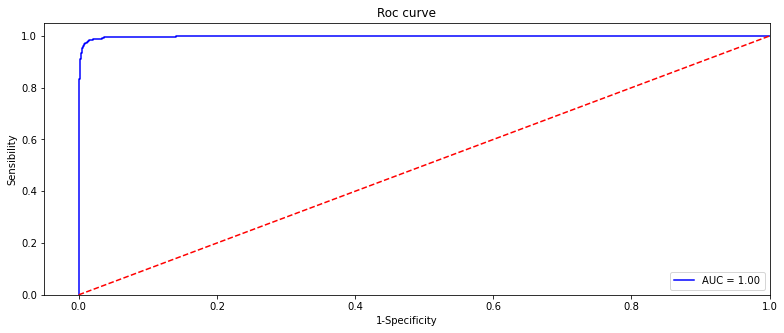

In [20]:
#other visualization method :
import sklearn.metrics as metrics
fpr, tpr, thresh = metrics.roc_curve(Y_test[:, 7], test_prediction[:, 7])
roc_auc = metrics.auc(fpr, tpr)
figure = plt.figure(figsize=(13,5))
ax1 = figure.add_subplot(1,1,1)
ax1.set_title('Roc curve')
ax1.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
ax1.legend(loc = 'lower right')
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_xlim([-0.05, 1])
ax1.set_ylim([0, 1.05])
ax1.set_ylabel('Sensibility')
ax1.set_xlabel('1-Specificity')

In [23]:
#saving
##the architecture :
json_model = model.to_json()
##weights :
model.save("my_dense_model.h5")